# K-means clustering exercises

1. Look at the non-convex clusters below from the lecture notes.

a) Use k-means clustering with k = 2 to cluster it, visualise the results and evaluate the silohuette score of the clusters. Interpret the value.

b) Loop through values of k up to 10 and see how it affects the silohuette score. Plot your findings.

<Axes: title={'center': 'Non-convex clusters'}, xlabel='x1', ylabel='x2'>

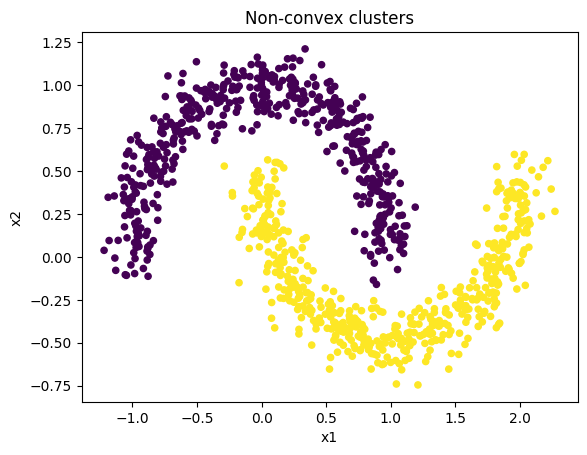

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=["x1", "x2"])
df.plot.scatter("x1", "x2", c=y, colormap="viridis", colorbar=False, title = "Non-convex clusters")

<Axes: title={'center': 'Non-convex clusters'}, xlabel='x1', ylabel='x2'>

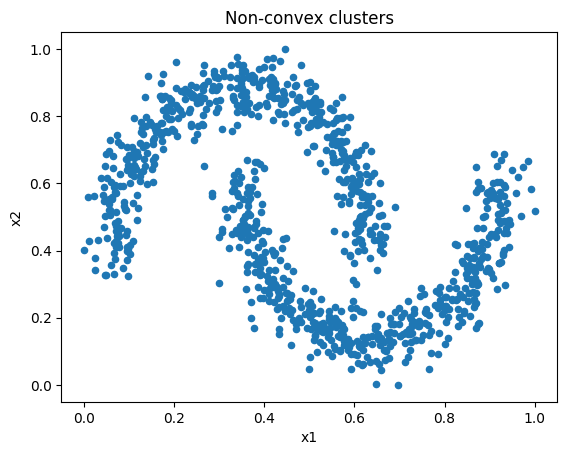

In [11]:
df.plot.scatter("x1", "x2", title = "Non-convex clusters")

In [2]:
df

,x1,x2
0,-0.051470,0.444199
1,1.032017,-0.419741
2,0.867892,-0.254827
3,0.288851,-0.448669
4,-0.833439,0.535057
...,...,...
995,0.810647,0.527220
996,-0.162279,0.912738
997,1.684259,-0.348223
998,-0.967201,0.263672


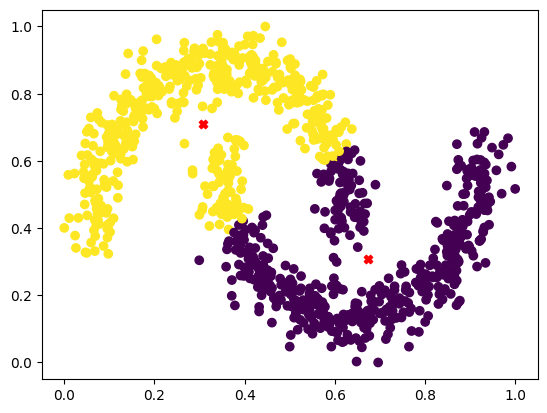

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 1. Scale the values before doing K-means clustering
scaler = MinMaxScaler()

scaler.fit(df[['x1']])
df['x1'] = scaler.transform(df[['x1']])


scaler.fit(df[['x2']])
df['x2'] = scaler.transform(df[['x2']])

# K-means clustering

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df[['x1', 'x2']])

df['cluster_code'] = y_pred

plt.scatter(df['x1'], df['x2'], c=df['cluster_code'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='X')


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(df[['x1', 'x2']], df[['cluster_code']])

/home/viklin/repos/ai_and_text_analytics/worksheets/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4913688119766198

This is *exactly* the kind of case where k-means shows its limits.

### What the clustering is doing

* The data are **non-convex** (“two moons”).
* **K-means assumes convex, roughly spherical clusters** and assigns points based on Euclidean distance to centroids.
* As a result, k-means **cuts the moons in a roughly vertical way**, grouping points that are spatially close but belong to different true moons.
* The red centroids sit in the “middle” of each half, not along the actual curved structure of the data.

So visually, the clustering is **not aligned with the true data-generating process**.

---

### Interpreting the silhouette score ≈ **0.49**

Recall the silhouette score:

* Close to **1** → very well separated clusters
* Around **0** → overlapping / ambiguous clusters
* Negative → clearly wrong assignments

A value of **~0.49** means:

* The clustering has **moderate separation**
* Many points are closer to their own cluster than the other
* But the structure is **far from optimal**

This is consistent with what we see:

* Locally, points are grouped with nearby points → decent cohesion
* Globally, the cluster shape is wrong → limited separation

In other words:

> **The silhouette score looks “okay”, but it is misleading in this non-convex setting.**

---

### Key takeaway

* A silhouette score around 0.5 might look acceptable in isolation
* **But k-means is fundamentally misspecified for this geometry**
* This example shows why **good quantitative metrics do not guarantee meaningful clustering**

This is a textbook motivation for:

* **DBSCAN**
* **Spectral clustering**
* **Agglomerative clustering**
  which can recover non-convex shapes and would yield both better visuals *and* more meaningful silhouette values.

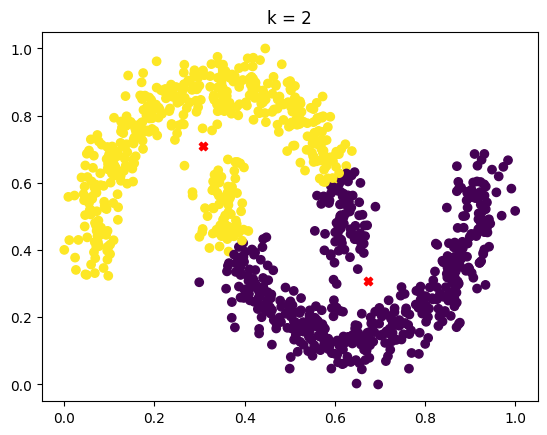

k = 2, silhouette = 0.491


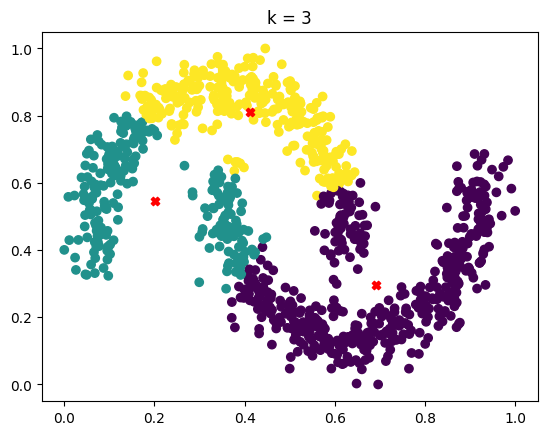

k = 3, silhouette = 0.443


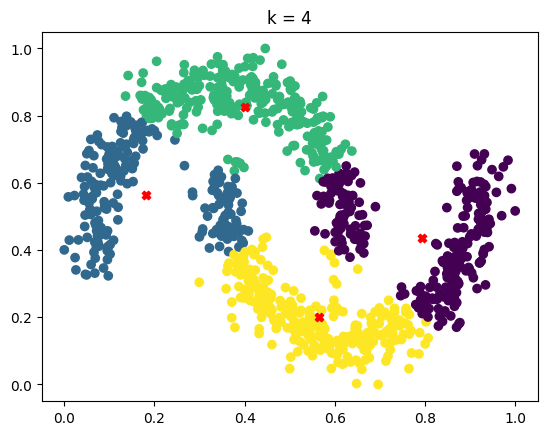

k = 4, silhouette = 0.428


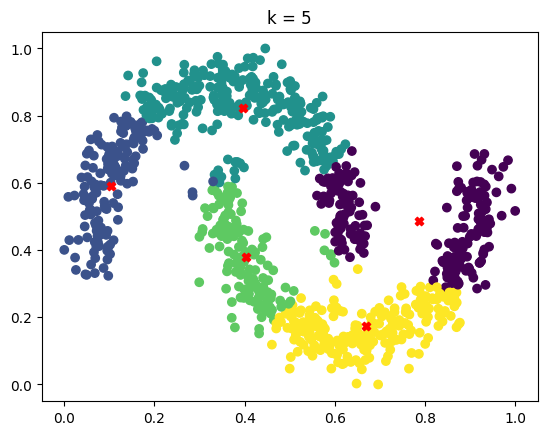

k = 5, silhouette = 0.439


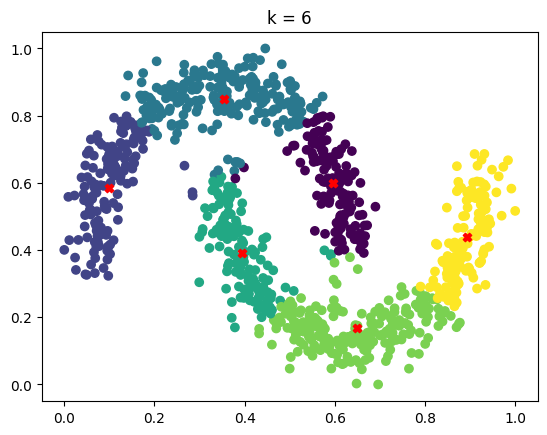

k = 6, silhouette = 0.465


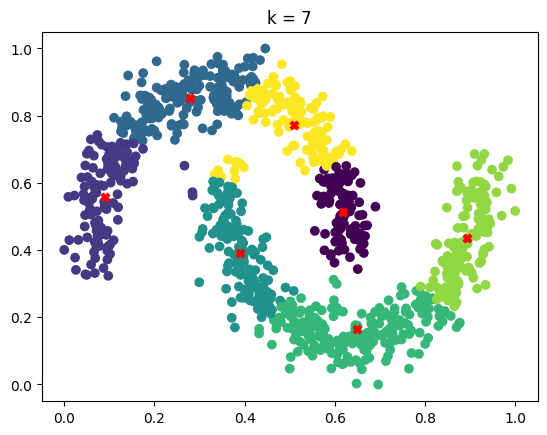

k = 7, silhouette = 0.460


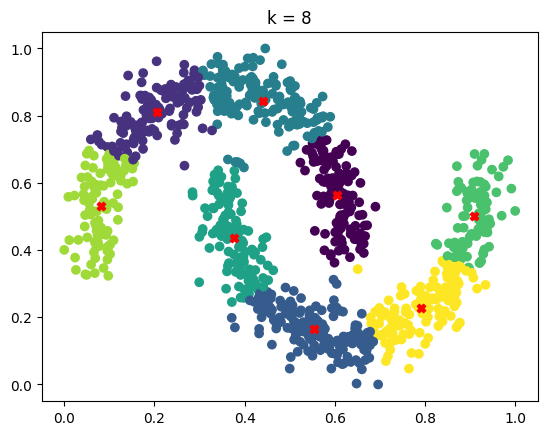

k = 8, silhouette = 0.460


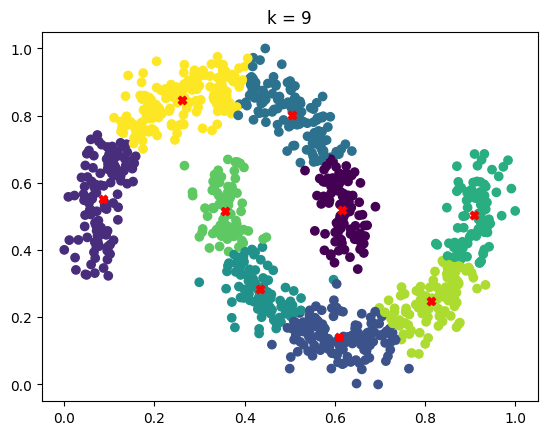

k = 9, silhouette = 0.462


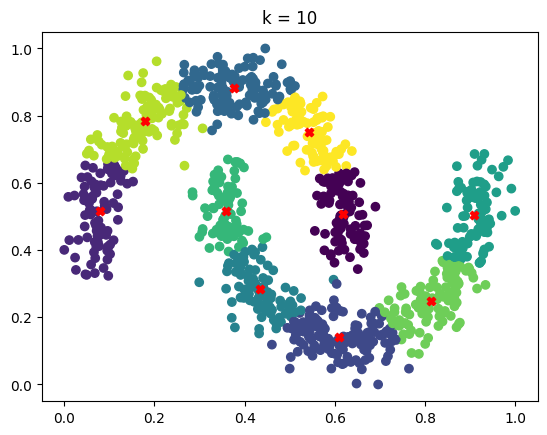

k = 10, silhouette = 0.461


In [27]:
def k_means_clustering(n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = km.fit_predict(df[['x1', 'x2']])

    df['cluster_code'] = y_pred

    plt.figure()
    plt.scatter(df['x1'], df['x2'], c=df['cluster_code'])
    plt.scatter(
        km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        color='red',
        marker='X'
    )
    plt.title(f'k = {n_clusters}')
    plt.show()

    score = silhouette_score(df[['x1', 'x2']], df['cluster_code'])
    print(f'k = {n_clusters}, silhouette = {score:.3f}')

for n in range(2, 11):
    k_means_clustering(n_clusters=n)


---
---

2) Code k-means clustering in numpy using the below guidelines, taken from: https://www.deep-ml.com/problems/17 (highly recommend this website for learning ML!)

**K-Means Clustering Algorithm Implementation**

*Initialization:*
Use the provided initial_centroids as your starting point. This step is already done for you in the input.

*Assignment Step:*
For each point in your dataset:
1. Calculate its distance to each centroid.
2. Assign the point to the cluster of the nearest centroid (use the Euclidean distance function).

*Update Step:*
For each cluster:
1. Calculate the mean of all points assigned to the cluster.
2. Update the centroid to this new mean position.
Hint: Be careful with potential empty clusters. Decide how you'll handle them (e.g., keep the previous centroid).

*Iteration:*
Repeat steps 2 and 3 until either:

1. The centroids no longer change significantly (this case does not need to be included in your solution), or
2. You reach the max_iterations limit.
Hint: You might want to keep track of the previous centroids to check for significant changes.

In [ ]:
def euclidean_distance(a, b):
  return np.sqrt(((a - b) ** 2).sum(axis=1))

def k_means_clustering(points: list[tuple[float, ...]], k: int, initial_centroids: list[tuple[float, ...]], max_iterations: int) -> list[tuple[float, ...]]:

  points = np.array(points)
  centroids = np.array(initial_centroids)

  for point in points:
      for centroid in centroids:
         euclidean_distance(point, centroid)
         

    
  final_centroids = []
  return final_centroids

In [37]:
# Your function should past these tests:

assert k_means_clustering([(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)], 2, [(1, 1), (10, 1)], 10) == [(1.0, 2.0), (10.0, 2.0)]

assert k_means_clustering([(0, 0, 0), (2, 2, 2), (1, 1, 1), (9, 10, 9), (10, 11, 10), (12, 11, 12)], 2, [(1, 1, 1), (10, 10, 10)], 10) == [(1.0, 1.0, 1.0), (10.3333, 10.6667, 10.3333)]

assert k_means_clustering([(1, 1), (2, 2), (3, 3), (4, 4)], 1, [(0,0)], 10) == [(2.5, 2.5)]

assert k_means_clustering([(0, 0), (1, 0), (0, 1), (1, 1), (5, 5), (6, 5), (5, 6), (6, 6),(0, 5), (1, 5), (0, 6), (1, 6), (5, 0), (6, 0), (5, 1), (6, 1)], 4, [(0, 0), (0, 5), (5, 0), (5, 5)], 10) == [(0.5, 0.5), (0.5, 5.5), (5.5, 0.5), (5.5, 5.5)]

AxisError: axis 1 is out of bounds for array of dimension 1

In [38]:
np.array([(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)])

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

# K-Nearest Neighbours Exercises

3. Look at the dataset from make_circles below.

a) Try and fit from values k = 1 -> 100 (use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function. Plot k against model score and choose which value of k is best, justify your decision.

b) Plot a [decision boundary](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) for the best score.

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)

# plot it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")

4. Given a list of points in n-dimensional space represented and a query point, implement a function to find the k nearest neighbors to the query point using Euclidean distance. Inspired by: https://www.deep-ml.com/problems/173

In [ ]:
import numpy as np

def k_nearest_neighbors(points, query_point, k):
    """
    Find k nearest neighbors to a query point

    Args:
        points: List of tuples representing points [(x1, y1), (x2, y2), ...]
        query_point: Tuple representing query point (x, y)
        k: Number of nearest neighbors to return

    Returns:
        List of k nearest neighbor points as tuples
    """
    if not points or k <= 0:
        return []

    if k > len(points):
        k = len(points)

    # Convert to numpy arrays for vectorized operations
    points_array = np.array(points)
    query_array = np.array(query_point)

    # Put the rest of your code here!

In [ ]:
# Your function should pass the following tests:

assert k_nearest_neighbors([(1, 2), (3, 4), (1, 1), (5, 6), (2, 3)], (2, 2), 3) == [(1, 2), (2, 3), (1, 1)]

assert k_nearest_neighbors([(0, 0), (1, 1), (2, 2), (3, 3)], (1.5, 1.5), 2) == [(1, 1), (2, 2)]

assert k_nearest_neighbors([(1, 1), (2, 2), (3, 3)], (0, 0), 1) == [(1, 1)]